In [22]:
def computefiberdata(width, height, cover, db, ds, nybar, nzbar, n, m, tiesspacing, ny, nz):
    """
    Compute fiber section properties for a rectangular column/beam
    using the Mander model approach in Midas Gen.
    
    Parameters:
    -----------
    width : Section width (y-direction)
    height : Section height (z-direction)
    cover : Concrete clear cover
    db : Diameter of main (longitudinal) bars
    ds : Diameter of ties (hoops)
    nybar : Number of longitudinal bars along y
    nzbar : Number of longitudinal bars along z
    n : Number of confinement subdivisions along y
    m : Number of confinement subdivisions along z
    tiesspacing (s) : Ties spacing
    ny: Confinement Rebar Number along y (legs)
    nz:  Confinement Rebar Number along z (legs)
    
    Returns: Dictionary of computed parameters for Midas Gen.
    """

    # 1. Effective core dimensions along y
    bc = width - 2 * cover - ds  # effective core width
    wyi = (bc - ds - (db * nybar)) / n  # fiber strip thickness along y
    
    # 2. Effective core dimensions along z
    dc = height - 2 * cover - ds  # effective core depth
    wzj = (dc - ds - (db * nzbar)) / m  # fiber strip thickness along z
    
    # 3. Rebar data
    rebarnumber = nybar * nzbar
    rebarsizemain = f"D{int(db)}"
    rebarsizeties = f"D{int(ds)}"
    
    # 4. Tie spacing
    tiesclearspacing = tiesspacing - ds  # clear hoops space
    
    # 5. Output dictionary
    results = {
        "bc": bc,
        "w'yi": wyi,
        "n": n,
        "dc": dc,
        "w'zj": wzj,
        "m": m,
        "rebarnumber": rebarnumber,
        "rebarsizemain": rebarsizemain,
        "rebarsizeties": rebarsizeties,
        "s": tiesspacing,
        "s'": tiesclearspacing,
        "ny": ny,
        "nz": nz
    }
    return results

##################
# MAIN EXECUTION #
##################

# samples only

datasets = [
        ("1c1", 200, 600, 40, 20, 12, 2, 4, 1, 3, 150, 4, 2),
        ("1c1a", 200, 600, 40, 20, 12, 2, 4, 2, 2, 150, 3, 3),
        ("1c2", 200, 600, 40, 20, 12, 2, 5, 1, 3, 150, 4, 2),
        ("1c2a", 200, 600, 40, 20, 12, 2, 5, 2, 2, 150, 3, 3),
        ("1c3", 300, 600, 40, 20, 12, 3, 4, 1, 3, 150, 4, 2),
        ("1c3a", 300, 600, 40, 20, 12, 3, 3, 2, 2, 150, 3, 3),
        ("1c3b", 300, 600, 40, 20, 12, 3, 4, 1, 3, 150, 4, 2),
        ("1c4", 250, 600, 40, 20, 12, 3, 3, 2, 2, 150, 3, 3),
        ("1c5", 400, 200, 40, 16, 10, 4, 4, 1, 3, 200, 4, 2),
        ("2c1", 200, 600, 40, 20, 12, 2, 3, 2, 2, 200, 3, 3),
        ("2c2", 200, 600, 40, 20, 12, 2, 4, 1, 3, 200, 4, 2),
        ("2c3", 300, 600, 40, 20, 12, 3, 3, 2, 2, 200, 3, 3),
        ("2c3b", 200, 600, 40, 20, 12, 2, 3, 2, 2, 200, 3, 3),
        ("2c4", 200, 600, 40, 20, 12, 2, 4, 1, 3, 200, 4, 2),
        ("2pc1", 200, 600, 40, 20, 10, 2, 3, 2, 2, 150, 3, 3)
    ]

keys_order = ["name", "width", "height", "cover", "db", "ds", "nybar", "nzbar", "n", "m", "tiesspacing", "ny", "nz"]

def tuple_to_dict(tup):
        return dict(zip(keys_order[1:], tup[1:]))

results_list = [computefiberdata(**tuple_to_dict(t)) for t in datasets]

headers = ["Name", "bc", "w'yi", "n", "dc", "w'zj", "m", "rebarnumber", "rebarsizemain", "rebarsizeties", "s", "s'", "ny", "nz"]
print(",".join(headers))
for i, (t, res) in enumerate(zip(datasets, results_list), start=1):
    row = [t[0], str(res["bc"]), str(res["w'yi"]), str(res["n"]), str(res["dc"]), str(res["w'zj"]), str(res["m"]), str(res["rebarnumber"]), str(res["rebarsizemain"]), str(res["rebarsizeties"]), str(res["s"]), str(res["s'"]), str(res["ny"]), str(res["nz"])]
    print(",".join(row))

# copy the output to notepad and save as csv

Name,bc,w'yi,n,dc,w'zj,m,rebarnumber,rebarsizemain,rebarsizeties,s,s',ny,nz
1c1,108,56.0,1,508,138.66666666666666,3,8,D20,D12,150,138,4,2
1c1a,108,28.0,2,508,208.0,2,8,D20,D12,150,138,3,3
1c2,108,56.0,1,508,132.0,3,10,D20,D12,150,138,4,2
1c2a,108,28.0,2,508,198.0,2,10,D20,D12,150,138,3,3
1c3,208,136.0,1,508,138.66666666666666,3,12,D20,D12,150,138,4,2
1c3a,208,68.0,2,508,218.0,2,9,D20,D12,150,138,3,3
1c3b,208,136.0,1,508,138.66666666666666,3,12,D20,D12,150,138,4,2
1c4,158,43.0,2,508,218.0,2,9,D20,D12,150,138,3,3
1c5,310,236.0,1,110,12.0,3,16,D16,D10,200,190,4,2
2c1,108,28.0,2,508,218.0,2,6,D20,D12,200,188,3,3
2c2,108,56.0,1,508,138.66666666666666,3,8,D20,D12,200,188,4,2
2c3,208,68.0,2,508,218.0,2,9,D20,D12,200,188,3,3
2c3b,108,28.0,2,508,218.0,2,6,D20,D12,200,188,3,3
2c4,108,56.0,1,508,138.66666666666666,3,8,D20,D12,200,188,4,2
2pc1,110,30.0,2,510,220.0,2,6,D20,D10,150,140,3,3


Unconfined (outer) rectangle corners:
  C1 = (0.0, 0.0)
  C2 = (300.0, 0.0)
  C3 = (300.0, 600.0)
  C4 = (0.0, 600.0)

Confined (inner) rectangle corners (center-line):
  S1 = (46.0, 46.0)
  S2 = (254.0, 46.0)
  S3 = (254.0, 554.0)
  S4 = (46.0, 554.0)

Rebar coordinates:
  R1 = (62.0, 62.0)
  R2 = (150.0, 62.0)
  R3 = (238.0, 62.0)
  R4 = (62.0, 220.66666666666666)
  R5 = (238.0, 220.66666666666666)
  R6 = (62.0, 379.3333333333333)
  R7 = (238.0, 379.3333333333333)
  R8 = (62.0, 538.0)
  R9 = (150.0, 538.0)
  R10 = (238.0, 538.0)


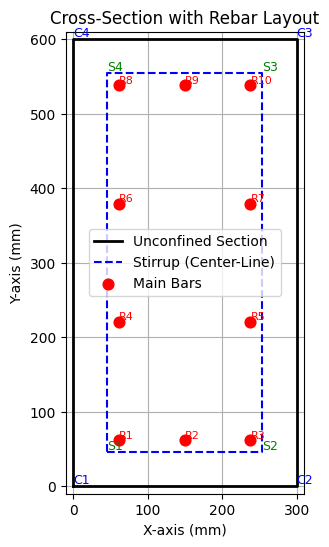

In [40]:
import matplotlib.pyplot as plt

def compute_rebar_coordinates(width, height, cover, ds, db, nx, ny):
    
    """
    Parameters:
    width    # Section width  [mm]
    height   # Section height [mm]
    cover    # Concrete cover (to stirrup outer face) [mm]
    ds       # Diameter of stirrups   [mm]
    d        # Diameter of main bars  [mm]
    nx       # Number of bars along top & bottom
    ny       # Number of bars along left & right
    
    Returns:
    'section_corners': 4 points (x, y) for the OUTER rectangle (unconfined section)
    'stirrup_corners': 4 points (x, y) for the STIRRUP CENTER-LINE rectangle
    'rebar_coords':    (x, y) locations for each main rebar
    """

    # -----------------------------------------------------------
    # 1) Outer rectangle corners (unconfined section)
    # -----------------------------------------------------------
    section_corners = [
        (0.0,  0.0),       # bottom-left
        (width,  0.0),       # bottom-right
        (width,  height),    # top-right
        (0.0,  height)       # top-left
    ]

    # -----------------------------------------------------------
    # 2) Stirrup center-line corners (confined section)
    #    Offset from the outer face by (cover + 0.5*ds)
    # -----------------------------------------------------------
    stirrup_offset = cover + 0.5 * ds
    stirrup_corners = [
        (stirrup_offset,              stirrup_offset),
        (width - stirrup_offset,      stirrup_offset),
        (width - stirrup_offset,      height - stirrup_offset),
        (stirrup_offset,              height - stirrup_offset)
    ]

    # -----------------------------------------------------------
    # 3) Main bar offset from the outer face
    #    = cover + ds + 0.5*db
    # -----------------------------------------------------------
    rebar_offset = cover + ds + 0.5 * db

    x_left  = rebar_offset
    x_right = width - rebar_offset
    y_bot   = rebar_offset
    y_top   = height - rebar_offset

    # -----------------------------------------------------------
    # 4) Compute rebar coordinates
    # -----------------------------------------------------------
    rebar_coords = []

    # Horizontal bars (top & bottom)
    if nx == 1:
        x_positions = [(x_left + x_right) / 2.0]
    else:
        dx = (x_right - x_left) / (nx - 1)
        x_positions = [x_left + i * dx for i in range(nx)]

    for x_pos in x_positions:
        rebar_coords.append((x_pos, y_bot))  # bottom
        rebar_coords.append((x_pos, y_top))  # top

    # Vertical bars (left & right)
    if ny == 1:
        y_positions = [(y_bot + y_top) / 2.0]
    else:
        dy = (y_top - y_bot) / (ny - 1)
        y_positions = [y_bot + i * dy for i in range(ny)]

    for y_pos in y_positions:
        rebar_coords.append((x_left,  y_pos))   # left
        rebar_coords.append((x_right, y_pos))   # right

    # Remove duplicates (corner bars appear in both sets)
    rebar_coords = list(set(rebar_coords))
    rebar_coords.sort(key=lambda pt: (pt[1], pt[0]))

    return {
        "section_corners":  section_corners,
        "stirrup_corners":  stirrup_corners,
        "rebar_coords":     rebar_coords
    }


def plot_beam_rebar(width, height, section_corners, stirrup_corners, rebar_coords, show_labels=True):

    fig, ax = plt.subplots(figsize=(5, 6))

    # --- 1) Outer rectangle (unconfined section) ---
    x_vals = [p[0] for p in section_corners] + [section_corners[0][0]]
    y_vals = [p[1] for p in section_corners] + [section_corners[0][1]]
    ax.plot(x_vals, y_vals, 'k-', linewidth=2, label="Unconfined Section")

    # --- 2) Stirrup center-line rectangle ---
    sx_vals = [p[0] for p in stirrup_corners] + [stirrup_corners[0][0]]
    sy_vals = [p[1] for p in stirrup_corners] + [stirrup_corners[0][1]]
    ax.plot(sx_vals, sy_vals, 'b--', linewidth=1.5, label="Stirrup (Center-Line)")

    # --- 3) Rebar points ---
    rx = [p[0] for p in rebar_coords]
    ry = [p[1] for p in rebar_coords]
    ax.scatter(rx, ry, s=60, c='red', marker='o', label="Main Bars")

    # --- 4) Labels ---
    if show_labels:
        for i, pt in enumerate(section_corners, start=1):
            ax.text(pt[0], pt[1], f"C{i}", color='blue', fontsize=9, ha='left', va='bottom')

        for i, pt in enumerate(stirrup_corners, start=1):
            ax.text(pt[0], pt[1], f"S{i}", color='green', fontsize=9, ha='left', va='bottom')

        for i, (xr, yr) in enumerate(rebar_coords, start=1):
            ax.text(xr, yr, f"R{i}", color='red', fontsize=8, ha='left', va='bottom')

    # --- 5) Formatting ---
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-10, width + 10)
    ax.set_ylim(-10, height + 10)
    ax.set_xlabel("X-axis (mm)")
    ax.set_ylabel("Y-axis (mm)")
    ax.set_title("Cross-Section with Rebar Layout")
    ax.legend()
    ax.grid(True)

    plt.show()


if __name__ == "__main__":
    # Parameters:
    width   = 300.0    # mm
    height  = 600.0    # mm
    cover   = 40.0     # mm  (measured to stirrup outer face)
    ds      = 12.0      # mm  (stirrup diameter)
    db      = 20.0     # mm  (main bar diameter)
    nx      = 3        # bars along top/bottom
    ny      = 4        # bars along left/right

    # Compute the coordinates
    results = compute_rebar_coordinates(width, height, cover, ds, db, nx, ny)

    section_corners  = results["section_corners"]
    stirrup_corners  = results["stirrup_corners"]
    rebar_coords     = results["rebar_coords"]

    # Print results
    print("Unconfined (outer) rectangle corners:")
    for i, corner in enumerate(section_corners, start=1):
        print(f"  C{i} = {corner}")

    print("\nConfined (inner) rectangle corners (center-line):")
    for i, corner in enumerate(stirrup_corners, start=1):
        print(f"  S{i} = {corner}")

    print("\nRebar coordinates:")
    for i, coord in enumerate(rebar_coords, start=1):
        print(f"  R{i} = {coord}")

    # Plot the section
    plot_beam_rebar(width, height, section_corners, stirrup_corners, rebar_coords, show_labels=True)